# MLE(Maximum Likelihood Estimation)
- 사실 우리가 앞에서 배운 MSE와 BCE는 **Likelihood**라는 공통된 뿌리를 가지고 있다고 생각합니다.
- 즉, 필자는 **Loss를 최소화 하는 파라미터를 찾는 딥러닝의 학습 과정이 사실 MLE, 즉 관측된 Measurement가 나올 가능성을 최대로 하는 파라미터를 찾는 과정과 같다**고 생각합니다.
    - 지금부터 차근차근 설명해보도록 하겠습니다.

### 앞의 이진분류를 다시...
- 첫 번째 사진에 대한 해당 동물일 확률을 아래의 수식을 사용했었습니다.
    - 혹시, 기억이 안나시면 앞에 BCE 출력정의에 같이 식이 나와있습니다. $$q^{y_{1}} (1 - q)^{1-y_{1}}$$
- 위 식이 바로 Likelihood식입니다.
    - Likelihood의 개념 : **가능도**라고 하며, **내가 가지고 있는 가설이 가진 데이터에 얼마나 잘 맞는지? 맞추는지?를 나타내는 정량석 정의**
    - 쉽게 말해 **관측된 Measurement가 나올 가능성을 가장 크게 하는 파라미터를 선택하자!!**

- 왜?
    1. 이 식은 모델의 예즉( $q_{1}$ )이 주어졌을 때, 실제 레이블 $y_{1}$이 나타날 확률을 나타냅니다. 즉, $ P(y_{1}|q_{1}) $과 같은 조건부 확률 입니다.
    2. $q_{1}$ 은 모델의 파라미터 w (여기서 w는 모든 파라미터를 담은 변수)에 의해 결정됩니다. 따라서 이 확률은 $P(y_{1}|w)$로 다시 쓸 수 있습니다.
    3. 이제, $y_{1}$을 주어진 Measurement를 보고, w를 변수로 보면 이 함수는 Likelihood가 됩니다.

- 그렇다면, 앞에서 예를 들던 강아지 분류는 MLE관점에서 보면, **강아지 레이블이 나왔을 때, 강아지 레이블이 나올 가능성을 가장 크게 하는 신경망의 w를 선책하는 것과 같습니다.**
- 따라서, 제일 처음 언급한 이 입력에는 이 출력이 나와야해!!는 **이 입력에는 이 출력이 나올 확률을 키워야해!!** 라는 MLE의 관점으로 바꿀수 있습니다.
- 이렇게 보면 딥러닝은 단순히 오차를 줄이는 것이 아니라 관측된 Measurement의 발생 가능성을 최대화하는 과정이다를 의미를 가지는 것을 알 수 있습니다.

#### 정리 : **Loss를 최소화 하는 파라미터를 찾는 학습 과정은 관측된(이미지의 라벨(정답지)) Measurement가 나올 가능성을 최대로 하는 w(파라미터의 모음)을 찾는 과정**이다.

# NLL (Negative Log-Likelihood)
- 지금이 글을 보고 있으신 분들은 이미 NLL을 보았습니다.
    - 2번 ipynb파일에서 BCE유도할때 마지막으로 log와 -붙였었습니다.
- **확률값에서 loss로 바꾸어주기 위해 '-'를** 붙이고, **UnderFlow 문제를 해결하기 위해 log를** 붙인다고 했었습니다.
- 또한 **원초적으로 딥러닝은 Likelihood다**. 라고 본 문서 바로 위의 MLE에서 말씀드렸습니다.
- 그럼 이 2가지를 다합친게 NLL입니다. 그럼 이 NLL어디에서 사용할 수 있을까? 이 물음에 대한 해답을 담았습니다.

- 먼저, 앞에서 나온 강아지가 나올 확률을 다시 한번 생각해보겠습니다.
    - 강아지가 나올 확률을 타나내는 $q^{y_{1}} (1 - q)^{1-y_{1}}$, 이식을 Likelohood $P(y_{1}|w)$ 로 해석해보았는데, 이는 베르누이 분포를 나타내는 식입니다.
        - 베르누이 분포는 강아지가 나올 확률을 그대로 표현한것이며, 강아지가 나올 확률이 q라면 고양이가 나올 확률이 1-q인 간단한 분포 입니다.
        - 아래 그림을 참고해주세요. 이 그림을 수식으로 나타내면, $q^{y_{1}} (1 - q)^{1-y_{1}}$입니다.   
        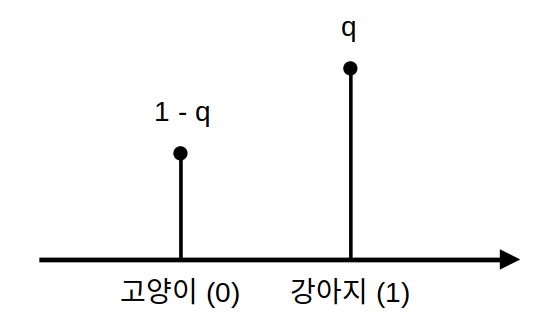

- 즉, Likelihood $P(y_{1}|w) = q^{y_{1}} (1 - q)^{1-y_{1}}$ 는 $y_{1}$이 베르누이 분포를 따른다고 가정하고 만든 수식입니다.
- 데이터가 여러개면, Likelihood는 $P(y_{1}, y_{2}, y_{3}, ... |w)$ 과 같이 결합 분포로 나타냅니다.
    - $ y_{1}, y_{2}, y_{3}, ... $이 서로 독립이면 이는 단순히 개별 확률을 곱 $P(y_{1}|w)P(y_{2}|w)P(y_{3}|w)... $ 이 됩니다.
    - 이를 전개하면 아래의 식과 같습니다.
    $$P(y_{1}|w)P(y_{2}|w)P(y_{3}|w)... = q_{1}^{y_{1}} (1 - q)^{1-y_{1}}q_{2}^{y_{2}} (1 - q)^{1-y_{2}}...$$
    - 여기에 NLL(-log)를 취하고 데이터의 개수(Batch size) N으로 나누면 아래의 식과 동일 하게 됩니다.
    $$-\frac{1}{N}q_{1}^{y_{1}} (1 - q)^{1-y_{1}}q_{2}^{y_{2}} (1 - q)^{1-y_{2}}... = \frac{1}{N}\displaystyle\sum^{n}-q_{n}^{y_{n}} (1 - q)^{1-y_{n}}$$
    - 마지막 식 어디서 많이 보지 않았나요? 바로 BCE Loss입니다.
    - 이렇게 **Likelihood에 -log를 취한 것을 NLL**이라 합니다.
        - 즉, **우리가 알고 있는 BCE Loss는 NLL로 부터 유도된 Loss함수 였던 것입니다.**

#### 정리 : **출력 레이블이 베르누이 분포**를 따른다고 가정하고 **Likelihood를 최대화 하는 파라미터 w를 추정**하기 위해 **NLL을 Loss로 사용한것**입니다.
- 금주 내용중 가장 중요한 부분이라 생각합니다.

- 다른, Loss도 위와 같이 유도가 가능합니다.(여기서는 따로 수식으로 유도하지는 않겠습니다.)
    - 출력 레이블이 **가우시안 분포**를 따른다고 가정하고 **Likelihood를 최대화 하는 파라미터 w를 추정하기 위해 NLL을 Loss**로 사용하면, **Loss함수가 MSE**가 됩니다.
    - 출력 레이블이 **라플라스 분포**를 따른다고 가정하고 **Likelihood를 최대화 하는 파라미터 w를 추정하기 위해 NLL을 Loss**로 사용하면, **Loss함수가 MAE**가 됩니다.
        - 라플라스 분포는 가우시안 분포에 비해 꼬리 부분의 확률 밀도가 더 크기 때문에 Outlier에 덜 영향을 받는 특정이 있어, 이 경우 MAE Loss가 더 적합할수 있습니다.
    - 출력 레이블이 **카테고리 분포**를 따른다고 가정하고 **Likelihood를 최대화 하는 파라미터 w를 추정하기 위해 NLL을 Loss**로 사용하면, **Loss함수가 Cross Entropy**가 됩니다.
        - 카테고리 분포는 베르누이 분포의 확상으로써 3개 이상의 출력값이 필요할때 사용되는 분포입니다.
- 아래 그림 참고

### 이점 : **우리가 해결하려는 문제에서는 레이블의 특성이 이러하니, 이러한 분포가 더 적절하겠다와 같이 논리적 사고가 가능**해진다.
### 정리 : **출력 레이블을 따르는 분포를 결정하고, Likelihood를 최대화 하는 파라미터 w를 추정하기 위해 NLL을 사용하면 Loss함수 결정**

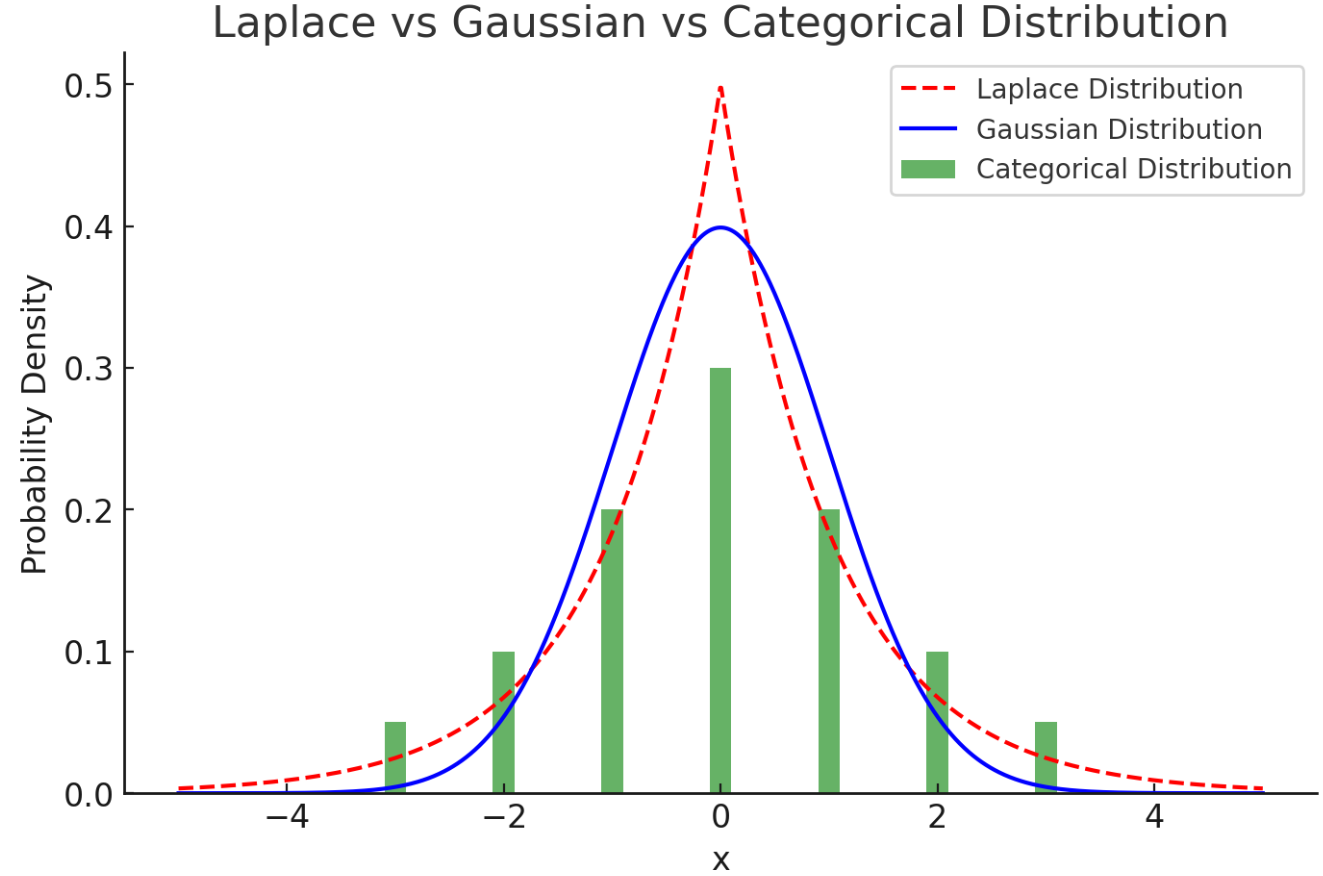